In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
airbnb = pd.read_csv('airbnb_cleaned_2.csv')

In [3]:
airbnb.head()

,unified_id,month,year,zipcode,city,host_type,bedrooms,bathrooms,guests,revenue,openness,occupancy,nightly_rate,lead_time,length_stay,hot_tub,pool,latitude,longitude
0,10000347,1,2020,92315,Big Bear Lake,2-5 Units,3,2.0,10,-0.938606,0.420154,-1.784796,0.023470,0.536739,-0.109353,0,0,34.242234,-116.943297
1,10000347,2,2020,92315,Big Bear Lake,2-5 Units,3,2.0,10,-1.006276,-0.130582,-1.893957,0.023531,-0.829748,-0.256137,0,0,34.242234,-116.943297
2,10000347,7,2020,92315,Big Bear Lake,2-5 Units,3,2.0,10,0.820992,-0.130582,1.490025,0.023531,-0.849512,-0.142713,0,0,34.242230,-116.943300
3,10000347,3,2021,92315,Big Bear Lake,2-5 Units,3,2.0,10,-0.261833,0.420154,-0.612329,0.023531,-0.872451,-0.219441,0,0,34.242230,-116.943300
4,10052559,1,2020,92315,Big Bear Lake,Professionals,3,2.5,8,0.438243,0.420154,-0.143342,0.572363,-0.434887,-0.151291,1,0,34.238977,-116.880301


In [4]:
airbnb = airbnb.drop(columns=['unified_id','zipcode','city','host_type','latitude','longitude'])
airbnb.head()

,month,year,bedrooms,bathrooms,guests,revenue,openness,occupancy,nightly_rate,lead_time,length_stay,hot_tub,pool
0,1,2020,3,2.0,10,-0.938606,0.420154,-1.784796,0.023470,0.536739,-0.109353,0,0
1,2,2020,3,2.0,10,-1.006276,-0.130582,-1.893957,0.023531,-0.829748,-0.256137,0,0
2,7,2020,3,2.0,10,0.820992,-0.130582,1.490025,0.023531,-0.849512,-0.142713,0,0
3,3,2021,3,2.0,10,-0.261833,0.420154,-0.612329,0.023531,-0.872451,-0.219441,0,0
4,1,2020,3,2.5,8,0.438243,0.420154,-0.143342,0.572363,-0.434887,-0.151291,1,0


In [5]:
airbnb.corr()

,month,year,bedrooms,bathrooms,guests,revenue,openness,occupancy,nightly_rate,lead_time,length_stay,hot_tub,pool
month,1.000000,-0.034502,-0.003049,0.001070,-0.002812,0.018676,0.186874,0.019755,-0.021640,0.059129,0.034695,0.015438,0.016362
year,-0.034502,1.000000,-0.013598,-0.009597,-0.024813,-0.108537,0.110108,-0.265951,0.047749,0.040536,-0.017088,0.040154,0.054413
bedrooms,-0.003049,-0.013598,1.000000,0.568646,0.637637,0.300312,-0.014752,-0.033652,0.447447,0.144174,-0.022974,0.127755,-0.030238
bathrooms,0.001070,-0.009597,0.568646,1.000000,0.619812,0.328801,0.005409,-0.051790,0.490582,0.122257,-0.021856,0.187320,-0.033591
guests,-0.002812,-0.024813,0.637637,0.619812,1.000000,0.311094,-0.003642,-0.083438,0.500083,0.124975,-0.038996,0.111174,-0.057561
revenue,0.018676,-0.108537,0.300312,0.328801,0.311094,1.000000,0.101478,0.575057,0.681624,0.215536,0.104270,0.257454,0.099520
openness,0.186874,0.110108,-0.014752,0.005409,-0.003642,0.101478,1.000000,0.002993,0.022756,-0.027896,0.015193,0.001601,0.008125
occupancy,0.019755,-0.265951,-0.033652,-0.051790,-0.083438,0.575057,0.002993,1.000000,-0.083924,0.258431,0.258994,0.116717,0.062710
nightly_rate,-0.021640,0.047749,0.447447,0.490582,0.500083,0.681624,0.022756,-0.083924,1.000000,0.077027,-0.065165,0.230617,0.056301
lead_time,0.059129,0.040536,0.144174,0.122257,0.124975,0.215536,-0.027896,0.258431,0.077027,1.000000,0.071475,0.095933,0.045524


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from xgboost import XGBRegressor
#from darts.models import RegressionEnsembleModel

In [7]:
# Feature selection
selected_features = ['bedrooms', 'bathrooms', 'guests', 'openness', 'occupancy', 'nightly_rate', 'lead_time', 'hot_tub', 'pool', 'length_stay']
X = airbnb[selected_features]
y = airbnb['revenue']

# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [8]:
# SVR model
svm_regressor = SVR(kernel='linear')
svm_regressor.fit(X_train, y_train)

SVR(kernel='linear')

In [9]:
# Random Forest Regression model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [10]:
# XGBoost model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [11]:
# Ensemble Regression model
#ensemble_model = RegressionEnsembleModel()
#ensemble_model.fit(X_train, y_train)

In [12]:
# Evaluate SVR model
y_pred_train_svm = svm_regressor.predict(X_train)
y_pred_test_svm = svm_regressor.predict(X_test)
svm_rmse_train = mean_squared_error(y_train, y_pred_train_svm, squared=False)
svm_rmse_test = mean_squared_error(y_test, y_pred_test_svm, squared=False)
svm_r2_train = r2_score(y_train, y_pred_train_svm)
svm_r2_test = r2_score(y_test, y_pred_test_svm)

In [13]:
# Evaluate Random Forest Regression model
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)
rf_rmse_train = mean_squared_error(y_train, y_pred_train_rf, squared=False)
rf_rmse_test = mean_squared_error(y_test, y_pred_test_rf, squared=False)
rf_r2_train = r2_score(y_train, y_pred_train_rf)
rf_r2_test = r2_score(y_test, y_pred_test_rf)

In [14]:
# Evaluate XGBoost model
y_pred_train_xgb = xgb_model.predict(X_train)
y_pred_test_xgb = xgb_model.predict(X_test)
xgb_rmse_train = mean_squared_error(y_train, y_pred_train_xgb, squared=False)
xgb_rmse_test = mean_squared_error(y_test, y_pred_test_xgb, squared=False)
xgb_r2_train = r2_score(y_train, y_pred_train_xgb)
xgb_r2_test = r2_score(y_test, y_pred_test_xgb)

In [15]:
# Print evaluation metrics
print("SVR Metrics:")
print("Training RMSE:", svm_rmse_train)
print("Testing RMSE:", svm_rmse_test)
print("Training R-squared:", svm_r2_train)
print("Testing R-squared:", svm_r2_test)
print()
print("Random Forest Regression Metrics:")
print("Training RMSE:", rf_rmse_train)
print("Testing RMSE:", rf_rmse_test)
print("Training R-squared:", rf_r2_train)
print("Testing R-squared:", rf_r2_test)
print()
print("XGBoost Metrics:")
print("Training RMSE:", xgb_rmse_train)
print("Testing RMSE:", xgb_rmse_test)
print("Training R-squared:", xgb_r2_train)
print("Testing R-squared:", xgb_r2_test)
print()

SVR Metrics:
Training RMSE: 0.2611087565407067
Testing RMSE: 0.2667562043642351
Training R-squared: 0.8712128449069856
Testing R-squared: 0.8679348391862822

Random Forest Regression Metrics:
Training RMSE: 0.011113805173413508
Testing RMSE: 0.032247068625276806
Training R-squared: 0.9997666782446155
Testing R-squared: 0.9980700782986673

XGBoost Metrics:
Training RMSE: 0.014616302387843687
Testing RMSE: 0.02889894570490755
Training R-squared: 0.9995964431576608
Testing R-squared: 0.9984500303151116



In [16]:
# Get feature importances for Random Forest Regression
importances_rf = rf_model.feature_importances_
feature_importance_df_rf = pd.DataFrame({'Feature': selected_features, 'Importance': importances_rf})
feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)

In [17]:
# Get feature importances for XGBoost
importances_xgb = xgb_model.feature_importances_
feature_importance_df_xgb = pd.DataFrame({'Feature': selected_features, 'Importance': importances_xgb})
feature_importance_df_xgb = feature_importance_df_xgb.sort_values(by='Importance', ascending=False)

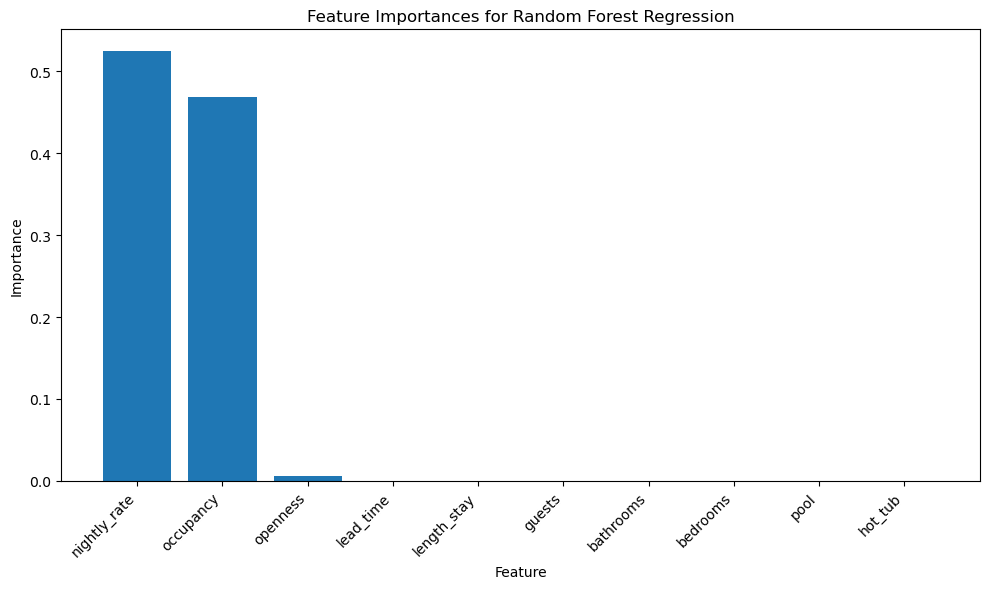

In [18]:
# Plot feature importances for Random Forest Regression
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df_rf['Feature'], feature_importance_df_rf['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances for Random Forest Regression')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

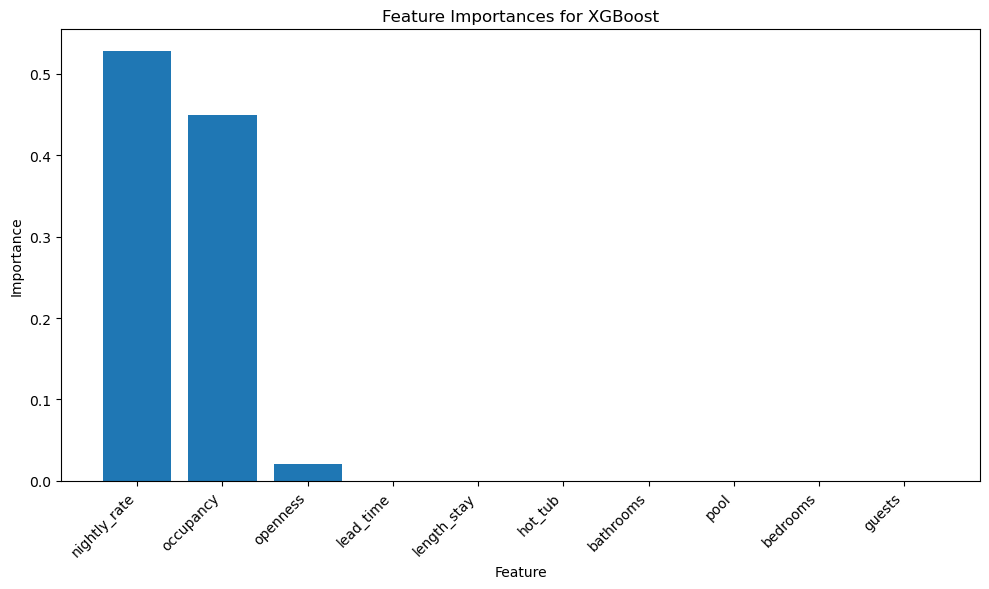

In [19]:
# Plot feature importances for XGBoost
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df_xgb['Feature'], feature_importance_df_xgb['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances for XGBoost')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()